## A short guide and example to run fingerprint

This notebook show how to use our implementation of the “fingerprinting approach” based on the Clarke and Minella (2016) method. The proposed alternative approach allows calculating the proportions of each source in the composition of suspended sediment present in rivers and measuring the increase in uncertainty when reducing the number of samples.
To do this, use the following:

The first step is to import the fingerprinting python module:

In [1]:
from fingerprint import Fingerprint

We need to create a fingerprinting object instance and to import the data file:

In [2]:
fp = Fingerprint("sampledata.xlsx")

In the next cell we can print some information about the dataset for:

CB = Channel Banks

UR = Unpaved Roads 

CF = Crop Fields

Y = Suspended Sediment 


In [3]:
fp.infos()

Sheet name: g_Source(CB)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: g_Source(UR)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: g_Source(CF)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 20
--
Sheet name: Sediment(Y)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 24
--


In [4]:
nsample=[]
nsample = fp.nsample(nsample)
print('nsample', nsample)


nCB = nsample[0]  # max 9
nUR = nsample[1]  # max 9
nCF = nsample[2] # max 20
nY = nsample[3] # max 24

sY,sCB,sUR,sCF = fp.randon_choice(nY, nCB, nUR, nCF)

# Run the models for all samples and solver options= 0 or 1 or 2
P = fp.run(sY,sCB,sUR,sCF, solve=2)
print(P.shape)

nsample [ 9  9 20 24]
(3, 5843)


Show de results for P1 and P2.

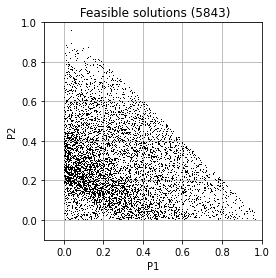

In [5]:
fp.plot2D(P[0:2], title = " Feasible solutions")

Cloud Proportions: The confidence region ($95\%$) calculated from the set of feasible solutions for all samples

Área: 0.4177986499815255


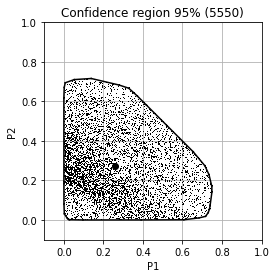

In [6]:
P = fp.confidence_region(P[0:2], p = 95, spacedist = "mahalanobis")
fp.plot2D(P, mean=True, convex_hull = True, title = "Confidence region 95%")

Run multiples times and store for each number of resample in nYs list 

The coefficient of variation CVYs

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nY samples

Samples sizes: [2, 4, 8, 12, 16, 20, 24]
Sample size: 2
Área: 0.370663333334591


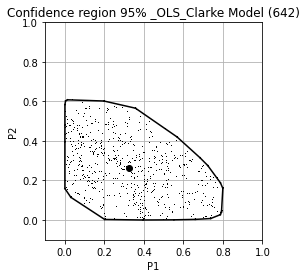

Área: 0.3877739813115283


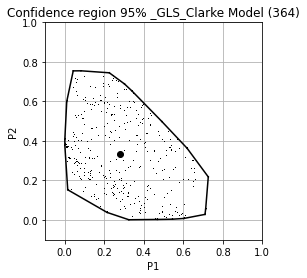

Sample size: 4
Sample size: 8
Sample size: 12
Área: 0.38654585048956813


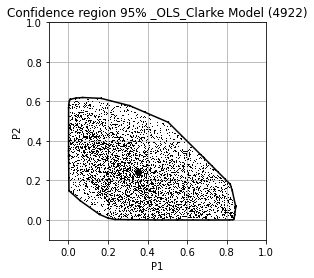

Área: 0.41598532201115224


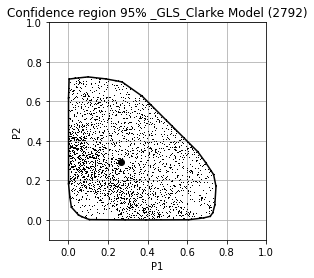

Sample size: 16
Sample size: 20
Área: 0.41259439170181367


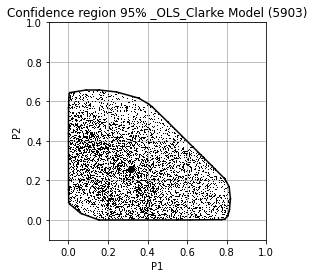

Área: 0.4162215034578801


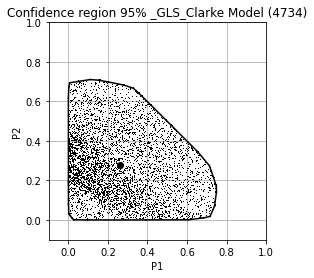

Sample size: 24
--------------------------------------------------------------
Solve_0
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.365 	0.037 	3240 	642 	0.324 	0.262 	0.414
4 	0.384 	0.029 	6480 	998 	0.348 	0.244 	0.408
8 	0.396 	0.013 	12960 	2394 	0.382 	0.221 	0.397
12 	0.398 	0.011 	19440 	4922 	0.350 	0.242 	0.408
16 	0.400 	0.008 	25920 	5744 	0.341 	0.234 	0.424
20 	0.402 	0.005 	32400 	5903 	0.317 	0.259 	0.424
24 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
--------------------------------------------------------------
Áreas médias: [0.365 0.384 0.396 0.398 0.4   0.402 0.403]
Desvios padrão: [10.212  7.642  3.304  2.729  2.066  1.2    0.   ]
--------------------------------------------------------------
Solve_1
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.365 	0.037 	3240 	642 	0.324 	0.262 	0.414
4 	0.384 	0.029 	6480 

In [7]:
nYs = [2,4,8,12,16,20,24]

Ycv0, Ycv1, Ycv2 = fp.multi_runs(50, nYs,nCB,nUR,nCF, plots2D=[2,12,20])


In [8]:
X1_0 = nYs.copy()
Y1_0 = Ycv0.copy()

X1_1 = nYs.copy()
Y1_1 = Ycv1.copy()

X1_2 = nYs.copy()
Y1_2 = Ycv2.copy()

Plots options

In [9]:
import matplotlib.pyplot as plt

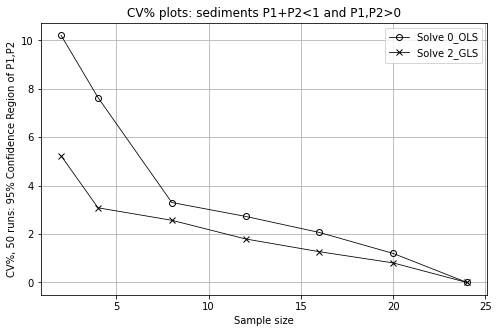

In [10]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         #X1_1, Y1_1, "ks-",
         X1_2, Y1_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0_OLS',
            #'Solve 1', 
            'Solve 2_GLS'], loc='upper right')
plt.savefig('Coeff_Var_nY.png')

plt.grid()
plt.show()

Run multiples times and store for each number of resample in nCFs list 

The coefficient of variation CFcv

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nCF samples

In [11]:
nCFs = [2,4,8,12,16,20]
CFcv0, CFcv1, CFcv2 = fp.multi_runs(50, nY,nCB,nUR,nCFs)

Samples sizes: [2, 4, 8, 12, 16, 20]
Sample size: 2
Sample size: 4
Sample size: 8
Sample size: 12
Sample size: 16
Sample size: 20
--------------------------------------------------------------
Solve_0
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.362 	0.041 	3888 	882 	0.386 	0.251 	0.363
4 	0.387 	0.028 	7776 	1234 	0.344 	0.213 	0.443
8 	0.391 	0.015 	15552 	2763 	0.302 	0.210 	0.487
12 	0.399 	0.010 	23328 	4479 	0.322 	0.233 	0.445
16 	0.401 	0.007 	31104 	5999 	0.341 	0.242 	0.417
20 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
--------------------------------------------------------------
Áreas médias: [0.362 0.387 0.391 0.399 0.401 0.403]
Desvios padrão: [11.3    7.12   3.859  2.566  1.705  0.   ]
--------------------------------------------------------------
Solve_1
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.362 	0.041 	38

In [12]:
X2_0 = nCFs.copy()
Y2_0 = CFcv0.copy()

X2_1 = nCFs.copy()
Y2_1 = CFcv0.copy()

X2_2 = nCFs.copy()
Y2_2 = CFcv2.copy()

Figure options

In [13]:
import matplotlib.pyplot as plt

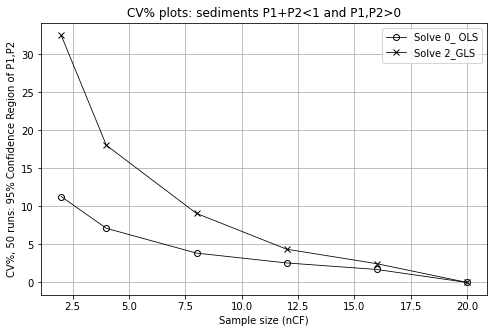

In [14]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X2_0, Y2_0, "ko-",
         #X2_1, Y2_1, "ks-",
         X2_2, Y2_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size (nCF)')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0_ OLS',
            #'Solve 1', 
            'Solve 2_GLS'], loc='upper right')
plt.savefig('Coeff_Var_nCF.png')

plt.grid()
plt.show()

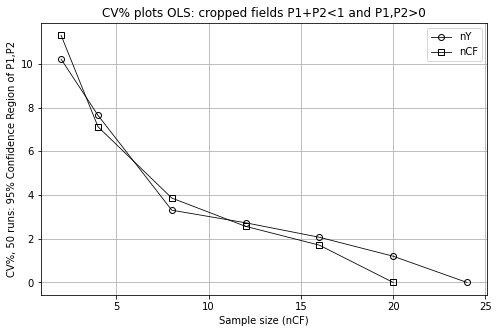

In [15]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         X2_0, Y2_0, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots OLS: cropped fields P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size (nCF)')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['nY',
            #'OLS3x3', 
            'nCF'], loc='upper right')
plt.savefig('Coeff_Var_nY_and_nCF_OLS.png')

plt.grid()
plt.show()

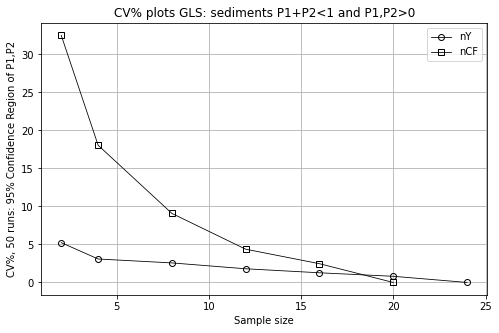

In [16]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_2, Y1_2, "ko-",
         X2_2, Y2_2, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots GLS: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['nY',
            'nCF'], loc='upper right')
plt.savefig('Coeff_Var_nY_and_nCF_GLS.png')

plt.grid()
plt.show()